In [5]:
from spectral_decomposition import spectrum
# Simulate 2 seconds at 500 Hz, with a 1/f exponent=2.0, offset=1.0
# plus a peak at 10 Hz (amplitude=50, sigma=2).
sampling_rate = 1000  # Hz
duration = 0.5 # seconds
aperiodic_exponent = 2.0
aperiodic_offset = 2.0
knee = 200
peaks = [{'freq': 12, 'amplitude': 1, 'sigma': 2}]

res = spectrum(
    sampling_rate=sampling_rate,
    duration=duration,
    aperiodic_exponent=aperiodic_exponent,
    aperiodic_offset=aperiodic_offset,
    knee=knee,
    peaks=peaks,
    average_firing_rate=0,
    random_state=42,
    direct_estimate=True,  # skip empirical PSD
    plot=False
)

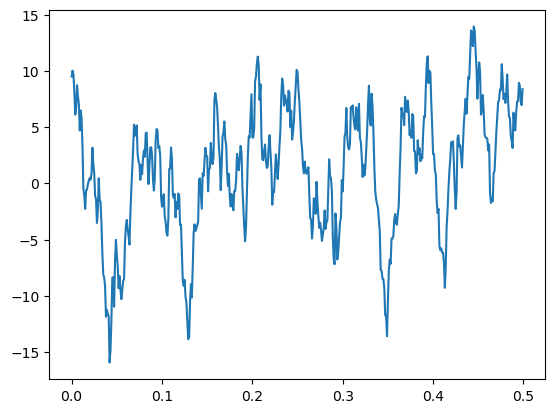

In [6]:
import matplotlib.pyplot as plt
plt.plot(res.time_domain.time, res.time_domain.combined_signal)

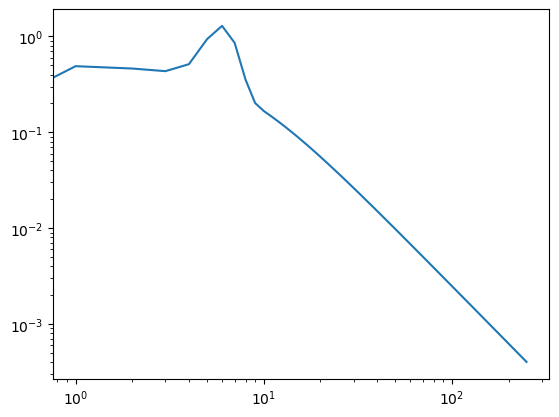

In [7]:
plt.loglog(res.frequency_domain.combined_spectrum)

/var/folders/qc/gskc2tx57z1gs3hq4hy86wfc0000gn/T/ipykernel_46353/1160152371.py:14: RuntimeWarning: divide by zero encountered in divide
  fft_result = fft(tapered_signal) / freqs**2


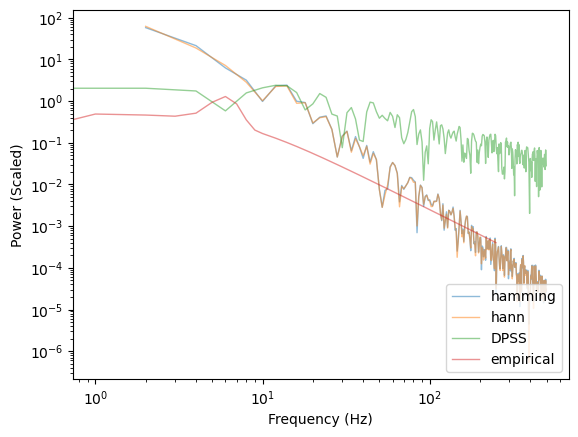

In [8]:
from scipy.signal import windows
from scipy.fft import fft
import numpy as np
import math

N = len(res.time_domain.time)
options = ['hamming', 'hann']

# Single Taper

for i in options:
    tapered_signal = res.time_domain.combined_signal * windows.get_window(i, N)
    freqs = np.fft.fftfreq(N, d=1/sampling_rate)
    fft_result = fft(tapered_signal) / freqs**2
    plt.loglog(freqs[:N // 2], np.abs(fft_result)[:N // 2], label=i, linewidth=1, alpha=0.5)

# Multi-taper

t_w = duration*sampling_rate/2-1 # TODO figure out if duration is what we think it is
L = math.floor(t_w)-1 # compare just 1 taper to start

tapered_signal = res.time_domain.combined_signal * windows.dpss(N, t_w, L)
sum = np.zeros(N)
freqs = np.fft.fftfreq(len(fft_result), d=1/sampling_rate)
for i in tapered_signal:
    fft_result = fft(i) #/ freqs**2
    sum = (fft_result) + sum
fft_result = sum / len(tapered_signal)
plt.loglog(freqs[:N // 2], np.abs(fft_result)[:N // 2], linewidth=1, alpha=0.5, label='DPSS')

plt.loglog(res.frequency_domain.combined_spectrum, linewidth=1, alpha=0.5, label='empirical')


plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (Scaled)")
plt.legend(loc="lower right")